In [4]:
import matplotlib.pyplot as plt

In [5]:
pip show matplotlib

Name: matplotlib
Version: 3.7.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\hp\anaconda3\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
nasdaq = yf.download("^IXIC", start="2010-01-01", end="2023-05-31")['Adj Close']
nifty = yf.download("^NSEI", start="2010-01-01", end="2023-05-31")['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
nasdaq

Date
2010-01-04     2308.419922
2010-01-05     2308.709961
2010-01-06     2301.090088
2010-01-07     2300.050049
2010-01-08     2317.169922
                  ...     
2023-05-23    12560.250000
2023-05-24    12484.160156
2023-05-25    12698.089844
2023-05-26    12975.690430
2023-05-30    13017.429688
Name: Adj Close, Length: 3374, dtype: float64

In [11]:
nifty

Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2023-05-24    18285.400391
2023-05-25    18321.150391
2023-05-26    18499.349609
2023-05-29    18598.650391
2023-05-30    18633.849609
Name: Adj Close, Length: 3289, dtype: float64

In [12]:
corr = nasdaq.corr(nifty)

In [13]:
corr

0.9511460419427026

<Axes: xlabel='Date'>

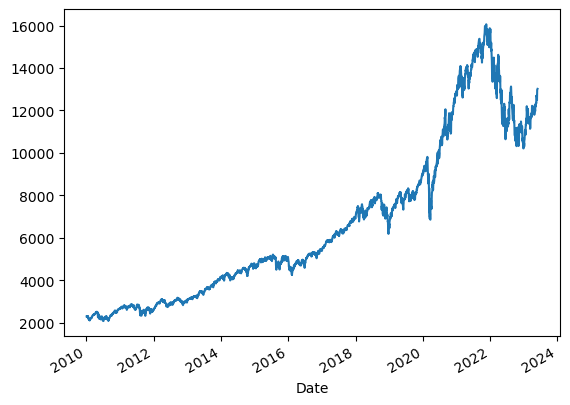

In [14]:

nasdaq.plot.line(y="Adj Close",use_index=True)


<Axes: xlabel='Date'>

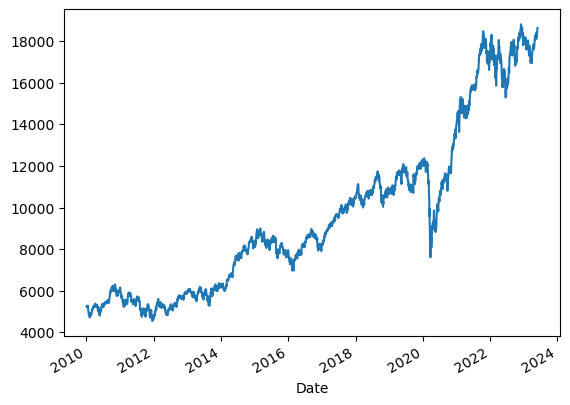

In [15]:
nifty.plot.line(y="Adj Close",use_index=True)

In [16]:
returns_nasdaq=nasdaq.pct_change()

In [17]:
returns_nasdaq

Date
2010-01-04         NaN
2010-01-05    0.000126
2010-01-06   -0.003300
2010-01-07   -0.000452
2010-01-08    0.007443
                ...   
2023-05-23   -0.012620
2023-05-24   -0.006058
2023-05-25    0.017136
2023-05-26    0.021862
2023-05-30    0.003217
Name: Adj Close, Length: 3374, dtype: float64

In [18]:
cum_returns=(returns_nasdaq+1).cumprod()
print(cum_returns.iloc[-1])

5.639108190041399


In [19]:
returns_nifty=nifty.pct_change()

In [20]:
returns_nifty

Date
2010-01-04         NaN
2010-01-05    0.008734
2010-01-06    0.000739
2010-01-07   -0.003540
2010-01-08   -0.003487
                ...   
2023-05-24   -0.003412
2023-05-25    0.001955
2023-05-26    0.009726
2023-05-29    0.005368
2023-05-30    0.001893
Name: Adj Close, Length: 3289, dtype: float64

In [21]:
cum_returns=(returns_nifty+1).cumprod()
print(cum_returns.iloc[-1])

3.561379326821051


# Lead-Lag Relationship

In [29]:
import pandas as pd
import yfinance as yf

# Get the historical prices of Nasdaq and Nifty
nasdaq = yf.download("^IXIC", start="2020-01-01", end="2023-06-06")
nifty = yf.download("^NSEI", start="2020-01-01", end="2023-06-06")

# Calculate the lead-lag relationship
lead_lag = nasdaq["Adj Close"].shift(1).corr(nifty["Adj Close"])

# Print the lead-lag relationship
print(lead_lag)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
0.6227821753433535


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

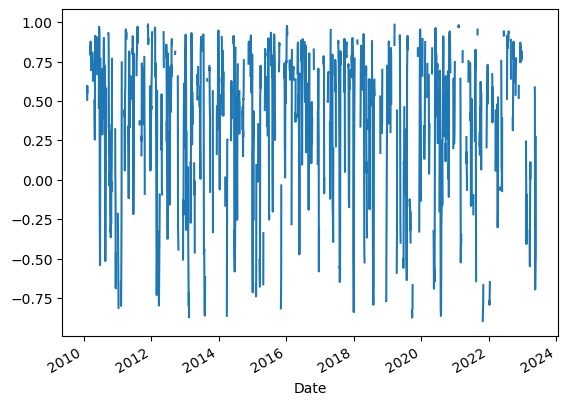

In [22]:
import pandas as pd
import yfinance as yf

# Get the data for the two stocks
df_stock1 = yf.download("^IXIC", start="2010-01-01", end="2023-06-03")
df_stock2 = yf.download("^NSEI", start="2010-01-01", end="2023-06-03")

# Calculate the rolling correlation
df_correlation = df_stock1["Adj Close"].rolling(window=10).corr(df_stock2["Adj Close"])

# Plot the rolling correlation
df_correlation.plot()


# KELTNER CHANNEL

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


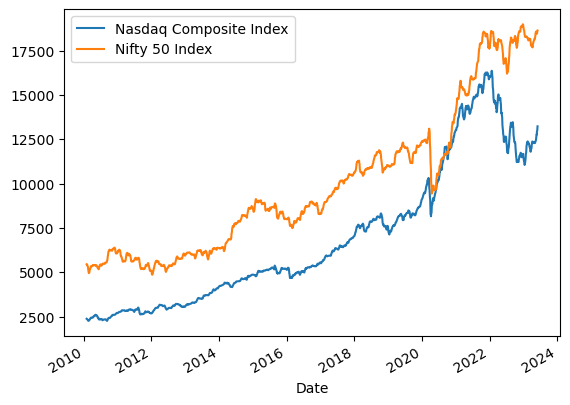

In [24]:
import pandas as pd
import yfinance as yf

# Get the data for the two indices
df_nasdaq = yf.download("^IXIC", start="2010-01-01", end="2023-06-03")
df_nifty = yf.download("^NSEI", start="2010-01-01", end="2023-06-03")

# Calculate the Keltner Channel
df_nasdaq["keltner_channel"] = df_nasdaq["Adj Close"].rolling(window=20).mean() + df_nasdaq["Adj Close"].rolling(window=20).std() * 2
df_nifty["keltner_channel"] = df_nifty["Adj Close"].rolling(window=20).mean() + df_nifty["Adj Close"].rolling(window=20).std() * 2

# Plot the Keltner Channel
df_nasdaq["keltner_channel"].plot(label="Nasdaq Composite Index")
df_nifty["keltner_channel"].plot(label="Nifty 50 Index")
plt.legend()
plt.show()


# MACD indicators of nasdaq index

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

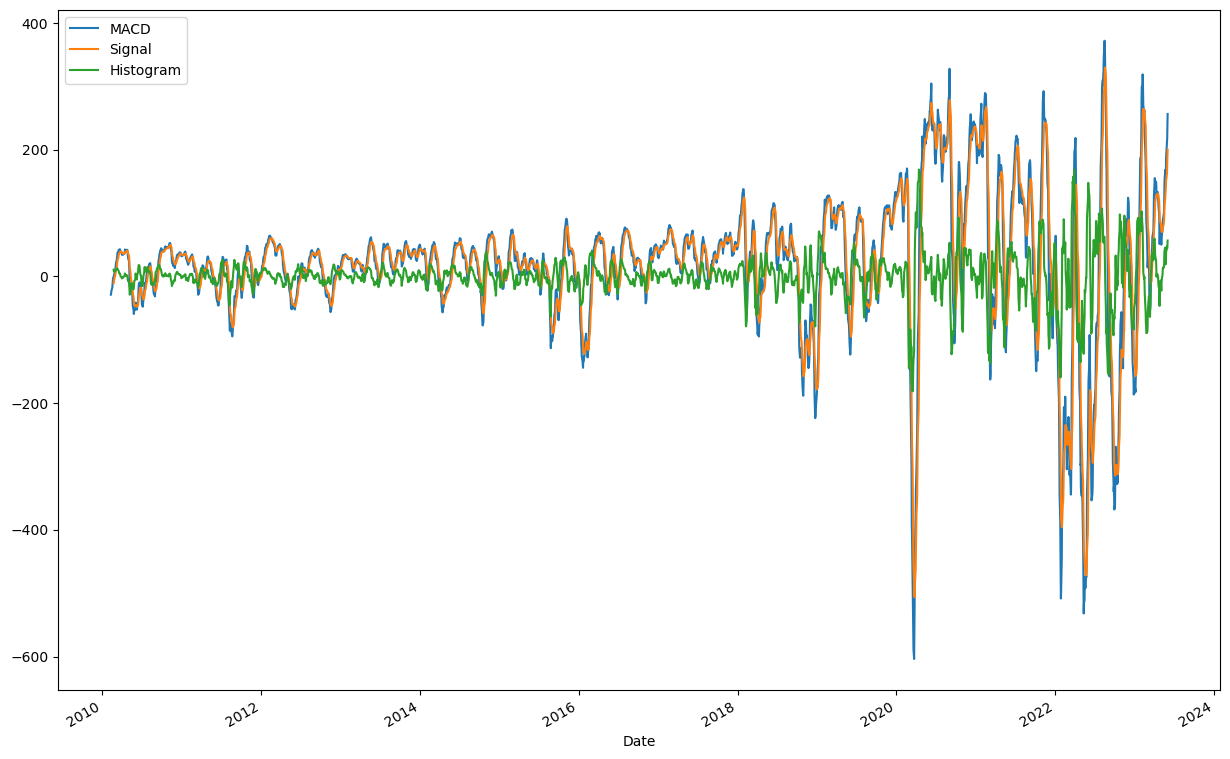

In [25]:
import pandas as pd
import yfinance as yf

def macd(df, short_window=12, long_window=26, signal_window=9):


  # Calculate the short-term and long-term moving averages.
  short_ema = df['Adj Close'].ewm(span=short_window, min_periods=short_window).mean()
  long_ema = df['Adj Close'].ewm(span=long_window, min_periods=long_window).mean()

  # Calculate the MACD line.
  macd = short_ema - long_ema

  # Calculate the signal line.
  signal = macd.ewm(span=signal_window, min_periods=signal_window).mean()

  # Calculate the histogram.
  histogram = macd - signal

  # Return a DataFrame containing the MACD, signal, and histogram columns.
  return pd.DataFrame({
      'MACD': macd,
      'Signal': signal,
      'Histogram': histogram,
  })

# Get the stock data from Yahoo Finance.
df = yf.download('^IXIC', start='2010-01-01', end='2023-06-03')

# Calculate the MACD indicator.
macd_df = macd(df)

# Plot the MACD indicator.
macd_df.plot(y=['MACD', 'Signal', 'Histogram'], figsize=(15, 10))

# MACD indicators of nifty index

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

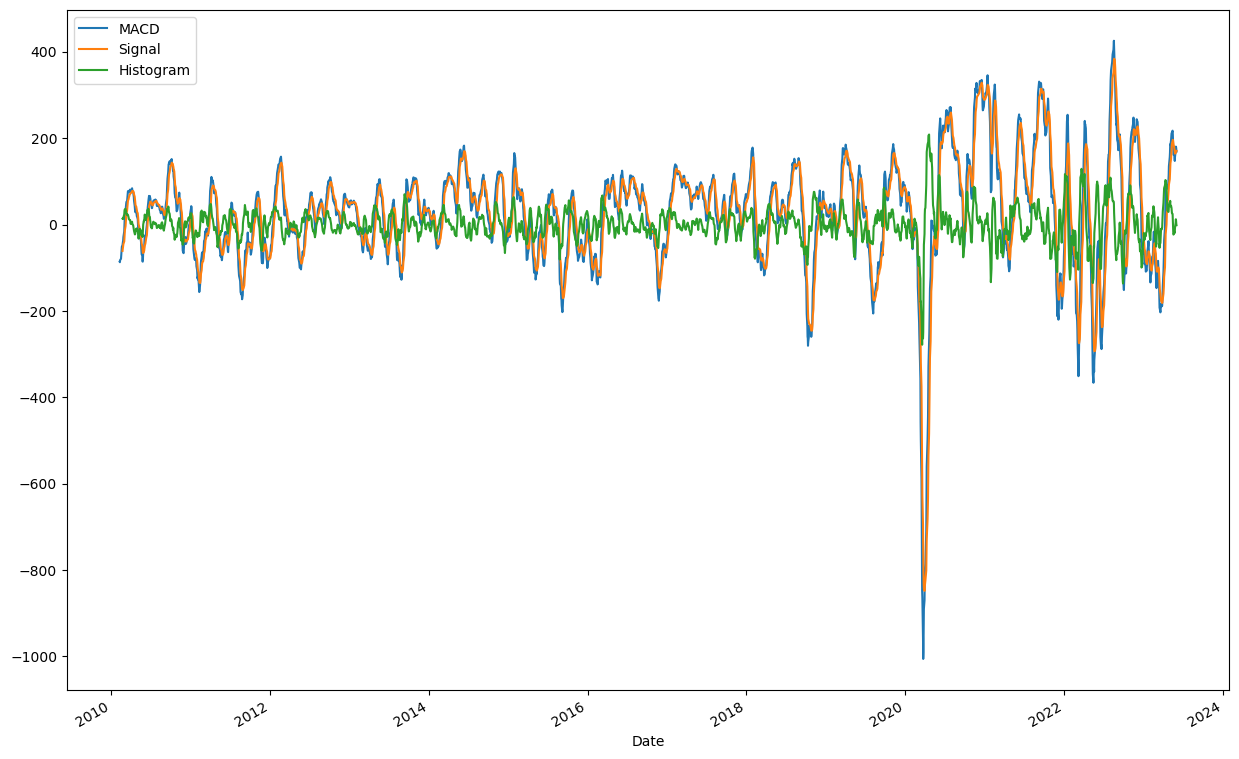

In [26]:
import pandas as pd
import yfinance as yf

def macd(df, short_window=12, long_window=26, signal_window=9):


  # Calculate the short-term and long-term moving averages.
  short_ema = df['Adj Close'].ewm(span=short_window, min_periods=short_window).mean()
  long_ema = df['Adj Close'].ewm(span=long_window, min_periods=long_window).mean()

  # Calculate the MACD line.
  macd = short_ema - long_ema

  # Calculate the signal line.
  signal = macd.ewm(span=signal_window, min_periods=signal_window).mean()

  # Calculate the histogram.
  histogram = macd - signal

  # Return a DataFrame containing the MACD, signal, and histogram columns.
  return pd.DataFrame({
      'MACD': macd,
      'Signal': signal,
      'Histogram': histogram,
  })

# Get the stock data from Yahoo Finance.
df = yf.download('^NSEI', start='2010-01-01', end='2023-06-03')

# Calculate the MACD indicator.
macd_df = macd(df)

# Plot the MACD indicator.
macd_df.plot(y=['MACD', 'Signal', 'Histogram'], figsize=(15, 10))

# Bollinger Bands

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


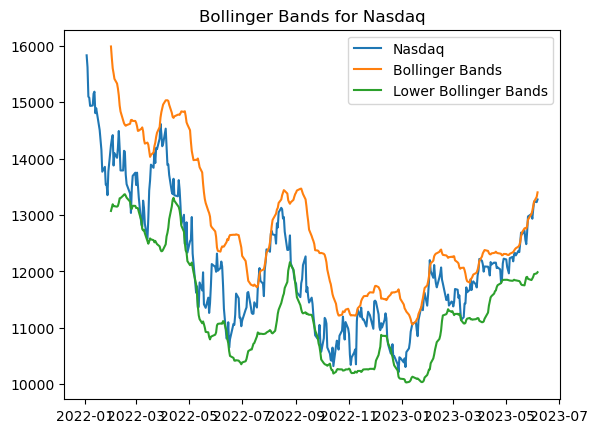

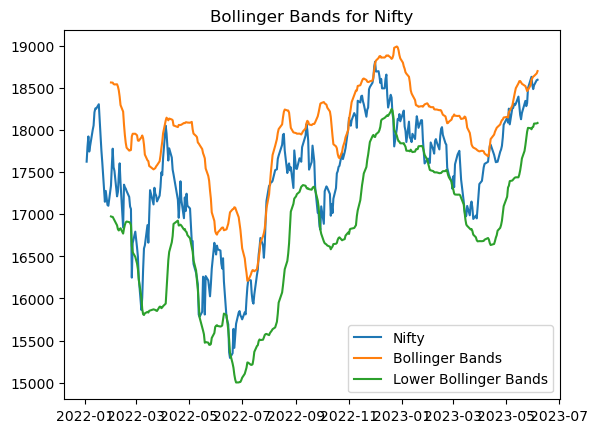

In [28]:
import yfinance as yf
import pandas as pd

def bollinger_band(df, period=20, std=2):
  

    # Calculate the moving average
    close_ma = df['Close'].rolling(period).mean()

    # Calculate the standard deviation
    close_std = df['Close'].rolling(period).std()

    # Calculate the upper and lower bands
    upper_band = close_ma + std * close_std
    lower_band = close_ma - std * close_std

    # Add the bands to the DataFrame
    df['Bollinger Bands'] = upper_band
    df['Lower Bollinger Bands'] = lower_band

    return df

# Get the data for the Nasdaq and Nifty
nasdaq = yf.download('^IXIC', start='2022-01-01', end='2023-06-07')
nifty = yf.download('^NSEI', start='2022-01-01', end='2023-06-07')

# Calculate the Bollinger Bands
nasdaq_bb = bollinger_band(nasdaq)
nifty_bb = bollinger_band(nifty)

# Plot the Bollinger Bands
plt.plot(nasdaq['Close'], label='Nasdaq')
plt.plot(nasdaq_bb['Bollinger Bands'], label='Bollinger Bands')
plt.plot(nasdaq_bb['Lower Bollinger Bands'], label='Lower Bollinger Bands')
plt.title('Bollinger Bands for Nasdaq')
plt.legend()
plt.show()

plt.plot(nifty['Close'], label='Nifty')
plt.plot(nifty_bb['Bollinger Bands'], label='Bollinger Bands')
plt.plot(nifty_bb['Lower Bollinger Bands'], label='Lower Bollinger Bands')
plt.title('Bollinger Bands for Nifty')
plt.legend()
plt.show()


# Parameter Optimization

In [30]:
import pandas as pd
import yfinance as yf

# Get the historical prices of Nifty
nifty = yf.download("^NSEI", start="2020-01-01", end="2023-06-06")

# Define the indicators
moving_average = pd.Series(nifty["Adj Close"].rolling(window=20).mean())
bollinger_bands = pd.DataFrame({
    "Bollinger Bands Upper": nifty["Adj Close"] + 2 * moving_average.std(),
    "Bollinger Bands Lower": nifty["Adj Close"] - 2 * moving_average.std()
})

# Optimize the parameters for the indicators
for window in range(10, 50, 10):
    for std in range(1, 3, 1):
        moving_average = pd.Series(nifty["Adj Close"].rolling(window=window).mean())
        bollinger_bands = pd.DataFrame({
            "Bollinger Bands Upper": nifty["Adj Close"] + 2 * moving_average.std(),
            "Bollinger Bands Lower": nifty["Adj Close"] - 2 * moving_average.std()
        })

        # Calculate the accuracy of the indicators
        accuracy = (nifty["Adj Close"] > bollinger_bands["Bollinger Bands Upper"]).mean()

        # Print the accuracy of the indicators
        print(f"Window: {window}, Std: {std}, Accuracy: {accuracy}")


[*********************100%***********************]  1 of 1 completed
Window: 10, Std: 1, Accuracy: 0.0
Window: 10, Std: 2, Accuracy: 0.0
Window: 20, Std: 1, Accuracy: 0.0
Window: 20, Std: 2, Accuracy: 0.0
Window: 30, Std: 1, Accuracy: 0.0
Window: 30, Std: 2, Accuracy: 0.0
Window: 40, Std: 1, Accuracy: 0.0
Window: 40, Std: 2, Accuracy: 0.0


# Signal Generation

In [35]:
import yfinance as yf
import pandas as pd

# Get the Nasdaq index data
nasdaq = yf.download("^IXIC", start="2022-01-01", end="2023-06-07")

# Calculate the moving averages
short_ma = nasdaq["Adj Close"].rolling(window=20).mean()
long_ma = nasdaq["Adj Close"].rolling(window=50).mean()

# Create a signal column
nasdaq["Signal"] = np.where(short_ma > long_ma, 1, -1)

# Buy and sell signals
nasdaq["Buy"] = np.where(nasdaq["Signal"] == 1, nasdaq["Adj Close"], np.nan)
nasdaq["Sell"] = np.where(nasdaq["Signal"] == -1, nasdaq["Adj Close"], np.nan)

# Print the results
print(nasdaq)


[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2022-01-03  15732.500000  15832.799805  15644.089844  15832.799805   
2022-01-04  15852.139648  15852.139648  15512.410156  15622.719727   
2022-01-05  15547.160156  15586.299805  15095.179688  15100.169922   
2022-01-06  15024.150391  15198.450195  14914.870117  15080.860352   
2022-01-07  15095.719727  15171.019531  14877.629883  14935.900391   
...                  ...           ...           ...           ...   
2023-05-31  12968.379883  13029.080078  12889.370117  12935.290039   
2023-06-01  12944.459961  13141.830078  12903.629883  13100.980469   
2023-06-02  13190.480469  13256.209961  13125.860352  13240.769531   
2023-06-05  13238.480469  13330.650391  13194.950195  13229.429688   
2023-06-06  13199.589844  13306.209961  13165.650391  13276.419922   

               Adj C